##3.1 RGB image of a tree
In this section we will create an RGB image of a tree. By the end of this section you should produce an image like this.

<img src=img/birch.op.png width=400>

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from run_start import *
from hips2img import *

##Running start to create an RGB image

Below is an example of running a spectral simulation:

<code>echo <font color=red>14</font> <font color=blue>camera/simple.camera</font> <font color=green>light/simple.light</font> | <font color=brown>start</font> -v <font color=pink>-RATm 5</font> <font color=orange>-RATsensor_wavebands wb/waveband.dat</font> obj/birch_tree.obj</code>

where:

<code><font color=red>14</font></code> is the librat mode

<code><font color=blue>camera/simple.camera</font></code> points at the <code><span style="background-color:lightgrey">simple.camera</span></code> file

<code><font color=green>light/simple.light</font></code> points at the <code><span style="background-color:lightgrey">simple.light</span></code> file

This pipes to <font color=brown>start</font> running in verbose (-v) mode, <font color=brown>start</font> has the additional following options:

<code><font color=pink>-RATm 5</font></code> stipulates the oder of scattering, in this case 5 orders.

<code><font color=orange>-RATsensor_wavebands wb/waveband.dat</font></code> points at a list of wavebands to simulate, these must correspond to wavelengths in the material reflectance files.

<code>birch_tree.obj</code> points at the <code><span style="background-color:lightgrey">birch_tree.obj</span></code>

start:

	VERBOSE flag on (-v option)

read_spectral_file:	4 data entries read in file wb/waveband.dat

camera simple camera: at 0.000000 0.000000 10.000000 focalLength: 5.000000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 0.000000 azimuth 0.000000 twist 0.000000

(100.00)


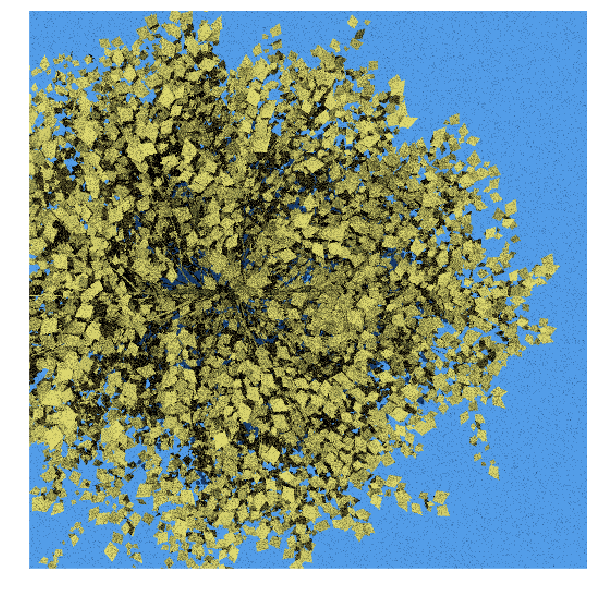

In [16]:
# all .obj and .dat are in specific folders e.g. camera.dat 
# is in the camera directory
cmd = 'echo 14 camera/simple.camera light/simple.light | \
       start -v -RATm 5 -RATsensor_wavebands wb/waveband.dat obj/birch_tree_scene.obj'
error = run_start(cmd)

if not error:
    # as stipulated in camera/simple.camera the output image is 
    # saved to output/birch.op.hips
    # 
    # When using hips2img to produce an RGB image, use the 'stretch' 
    # arg otherwise image is dark
    hips2img('output/birch.op.hips', stretch=True)

##Creating a spectra from the output
As well as producing an image, librat also produces a table of refletance.  This can be ordered by "wavelength" i.e. different wavelengths are the column headers, or as here, by scattering order.  This table can be read in using Numpy as below. Here the scattering orders have been summed (<code>refl[:, 1:].sum(axis=0)</code>).

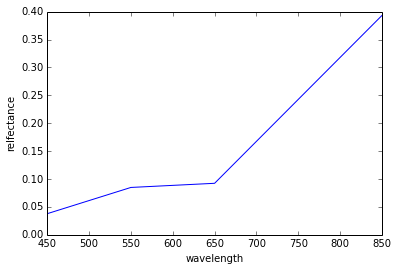

In [18]:
refl = np.loadtxt('output/birch.op.results.direct')
wb = np.loadtxt('wb/waveband.dat')
plt.plot(wb[:, 1], refl[:, 1:].sum(axis=0))
plt.xlabel('wavelength')
plt.ylabel('relfectance')